In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
df =pd.read_csv("Online Retail.csv")

In [109]:
df.keys()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [110]:
df.shape

(406829, 8)

In [111]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [112]:
df=df.loc[df["Quantity"] >0]

In [113]:
df.shape

(397924, 8)

In [114]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [115]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 8:26,3.39,17850.0,United Kingdom


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 19.7+ MB


In [117]:
df["InvoiceDate"] = pd.to_datetime(df.InvoiceDate)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 21.3+ MB


In [119]:
df["Sale"] =df.Quantity * df.UnitPrice

In [120]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [121]:
monetary =df.groupby("CustomerID").Sale.sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Sale
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [122]:
#frequency of customer

In [123]:
frequency=df.groupby("CustomerID").InvoiceNo.count()

In [124]:
frequency = frequency.reset_index()

In [125]:
frequency

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [126]:
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [127]:
LastDate=max(df.InvoiceDate)

In [128]:
LastDate

Timestamp('2011-12-10 17:19:00')

In [129]:
LastDate = LastDate + pd.DateOffset(days=1)

In [130]:
LastDate

Timestamp('2011-12-11 17:19:00')

In [131]:
df["Diff"] = LastDate - df.InvoiceDate

In [132]:
recency = df.groupby("CustomerID").Diff.min()

In [133]:
recency = recency.reset_index()
recency.head()

,CustomerID,Diff
0,12346.0,327 days 07:18:00
1,12347.0,41 days 04:54:00
2,12348.0,77 days 04:06:00
3,12349.0,20 days 07:28:00
4,12350.0,312 days 01:18:00


In [134]:
#rmf cmbined data

In [135]:
rmf = monetary.merge(frequency, on = "CustomerID")

In [136]:
rmf = rmf.merge(recency, on = "CustomerID")

In [137]:
rmf.columns = ["CustomerID", "Monetary", "Frequence", "Recency"]

In [138]:
rmf

,CustomerID,Monetary,Frequence,Recency
0,12346.0,77183.60,1,327 days 07:18:00
1,12347.0,4310.00,182,41 days 04:54:00
2,12348.0,1797.24,31,77 days 04:06:00
3,12349.0,1757.55,73,20 days 07:28:00
4,12350.0,334.40,17,312 days 01:18:00
...,...,...,...,...
4334,18280.0,180.60,10,161 days 07:27:00
4335,18281.0,80.82,7,5 days 06:26:00
4336,18282.0,178.05,12,217 days 03:44:00
4337,18283.0,2094.88,756,11 days 04:20:00


In [171]:
RMF1 = rmf.drop("CustomerID",axis =1)
RMF1.Recency = RMF1.Recency.dt.days
RMF1

,Monetary,Frequence,Recency
0,77183.60,1,327
1,4310.00,182,41
2,1797.24,31,77
3,1757.55,73,20
4,334.40,17,312
...,...,...,...
4334,180.60,10,161
4335,80.82,7,5
4336,178.05,12,217
4337,2094.88,756,11


In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
ss = StandardScaler()

In [166]:
#RMF1 = ss.fit_transform(RMF1)

In [172]:
RMF1 = pd.DataFrame(RMF1 , columns=[ "Monetary", "Frequence", "Recency"])

In [173]:
RMF1

,Monetary,Frequence,Recency
0,77183.60,1,327
1,4310.00,182,41
2,1797.24,31,77
3,1757.55,73,20
4,334.40,17,312
...,...,...,...
4334,180.60,10,161
4335,80.82,7,5
4336,178.05,12,217
4337,2094.88,756,11


In [174]:
#RMF1=ss.fit_transform(RMF1)

In [175]:
from sklearn.cluster import KMeans

In [176]:
ssd = []
for k in range(1, 20):
    km = KMeans(n_clusters=k)
    km.fit(RMF1)
    ssd.append(km.inertia_)

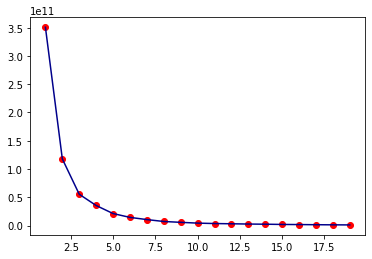

In [177]:
plt.plot(np.arange(1,20), ssd,color="darkblue")
plt.scatter(np.arange(1,20), ssd,color="red")

plt.show()

In [178]:
model = KMeans(n_clusters=5)
ClusterID = model.fit_predict(RMF1)

In [179]:
ClusterID

array([2, 0, 0, ..., 0, 0, 0])

In [180]:
RMF1["ClusterID"] = ClusterID

In [181]:
RMF1

,Monetary,Frequence,Recency,ClusterID
0,77183.60,1,327,2
1,4310.00,182,41,0
2,1797.24,31,77,0
3,1757.55,73,20,0
4,334.40,17,312,0
...,...,...,...,...
4334,180.60,10,161,0
4335,80.82,7,5,0
4336,178.05,12,217,0
4337,2094.88,756,11,0


In [182]:
RMF1.head()

,Monetary,Frequence,Recency,ClusterID
0,77183.60,1,327,2
1,4310.00,182,41,0
2,1797.24,31,77,0
3,1757.55,73,20,0
4,334.40,17,312,0


In [49]:
#RMF1= ss.fit_transform(RMF1)

In [183]:
km_cluster_sale =RMF1.groupby("ClusterID").Monetary.mean()
km_cluster_Recency =RMF1.groupby("ClusterID").Recency.mean()
km_cluster_Frequence =RMF1.groupby("ClusterID").Frequence.mean()

In [184]:
km_cluster_sale

ClusterID
0      1049.274575
1    269931.660000
2     51858.727500
3     10022.790242
4    149828.502000
Name: Monetary, dtype: float64

In [185]:
import seaborn as sns

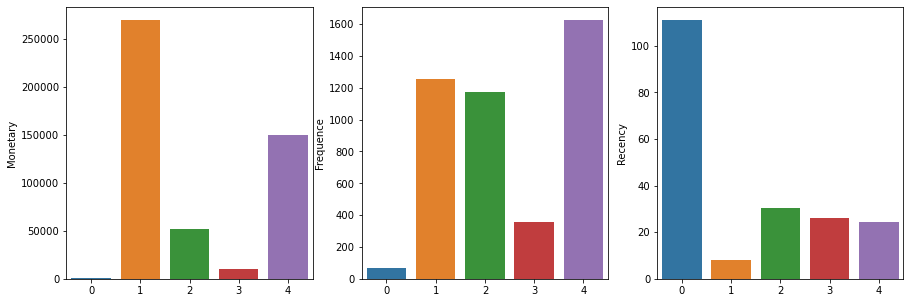

In [187]:
fig, axs = plt.subplots(1,3, figsize = (15, 5))
sns.barplot(x = [0,1,2,3,4],  y = km_cluster_sale , ax = axs[0])
sns.barplot(x = [0,1,2,3,4],  y = km_cluster_Frequence , ax = axs[1])
sns.barplot(x = [0,1,2,3,4],  y = km_cluster_Recency , ax = axs[2])


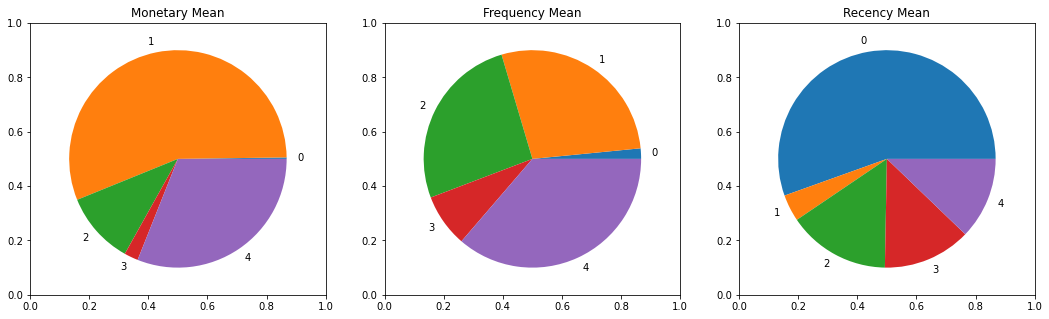

In [201]:
fig,axis = plt.subplots(1,3, figsize =(18,5))
ax1 =fig.add_subplot(1,3,1)
plt.title("Monetary Mean")
ax1.pie(km_cluster_sale, labels =[0,1,2,3,4])

ax1 =fig.add_subplot(1,3,2)
plt.title("Frequency Mean")
ax1.pie(km_cluster_Frequence, labels =[0,1,2,3,4])

ax1 =fig.add_subplot(1,3,3)
plt.title("Recency Mean")
ax1.pie(km_cluster_Recency, labels =[0,1,2,3,4])
plt.show()
